# **Importing Data & Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse

In [ ]:
df_1 = pd.read_csv("/content/Time_Series_AQI.csv")

In [ ]:
df_1.head()

,From Date,AQI_Value
0,12-01-2021 00:00,47
1,13-01-2021 00:00,75
2,14-01-2021 00:00,53
3,15-01-2021 00:00,65
4,16-01-2021 00:00,56


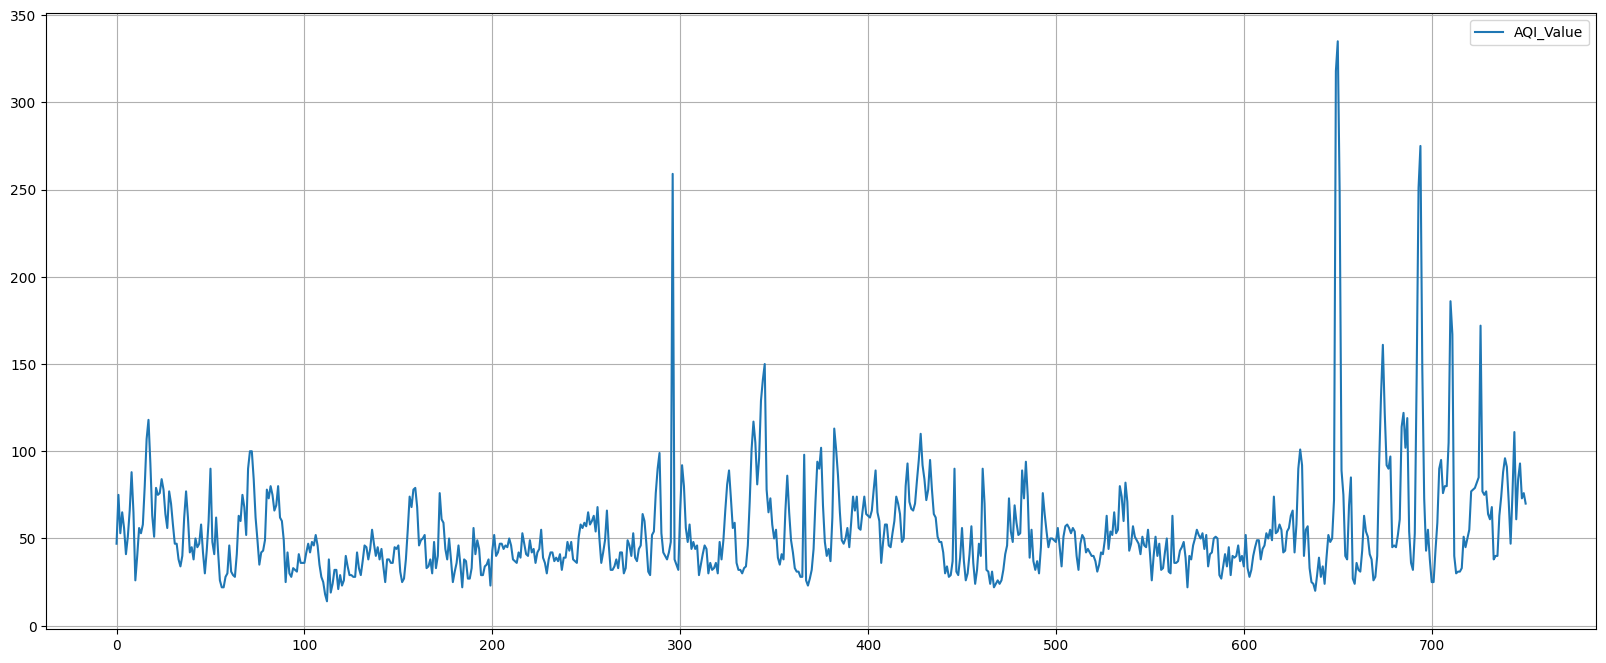

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df_1.plot();
plt.grid()


In [ ]:
df_1['From Date'] = pd.to_datetime(df_1['From Date'])

In [ ]:
df = df_1.set_index('From Date')
df.head()

,AQI_Value
From Date,
2021-12-01,47
2021-01-13,75
2021-01-14,53
2021-01-15,65
2021-01-16,56


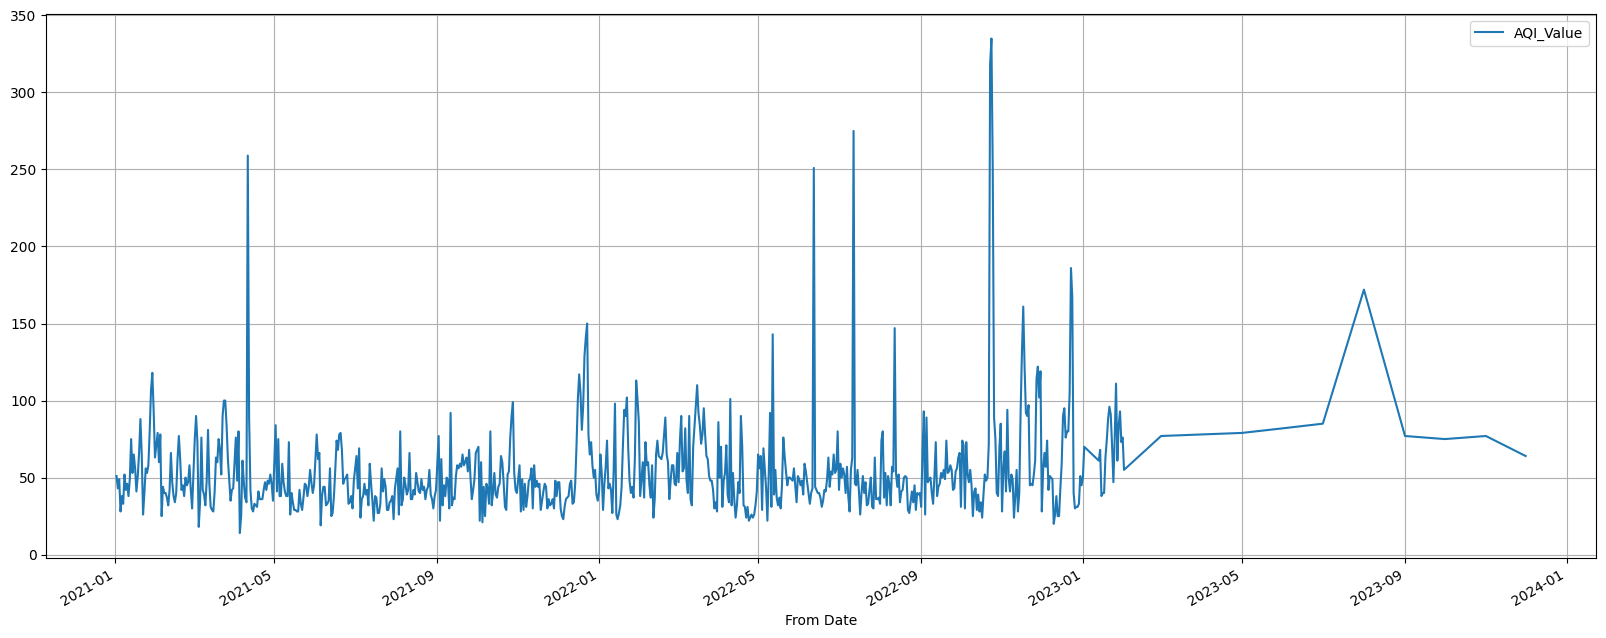

In [ ]:
df.plot(figsize=(20,8))
plt.grid();

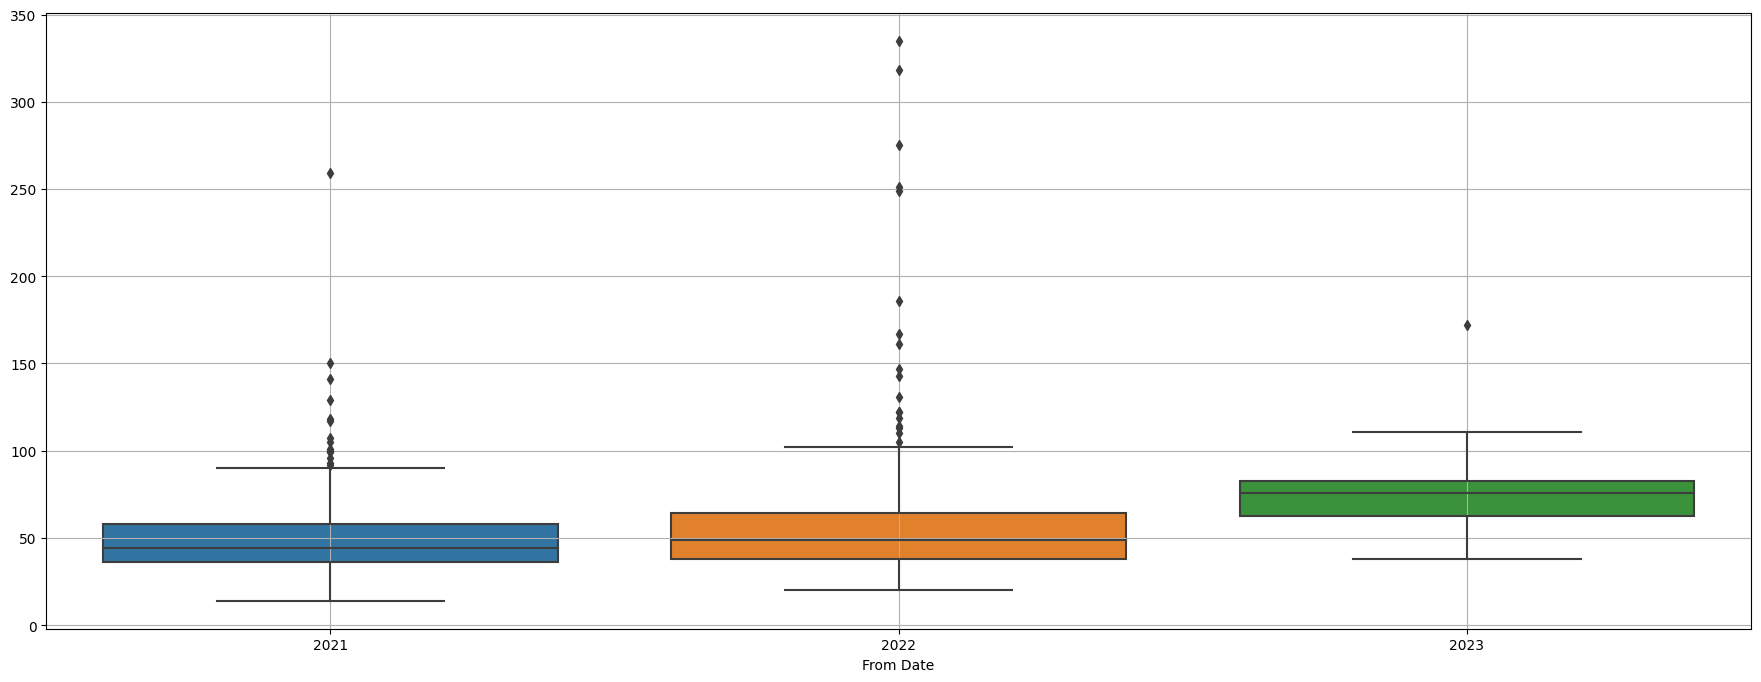

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))
#_,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

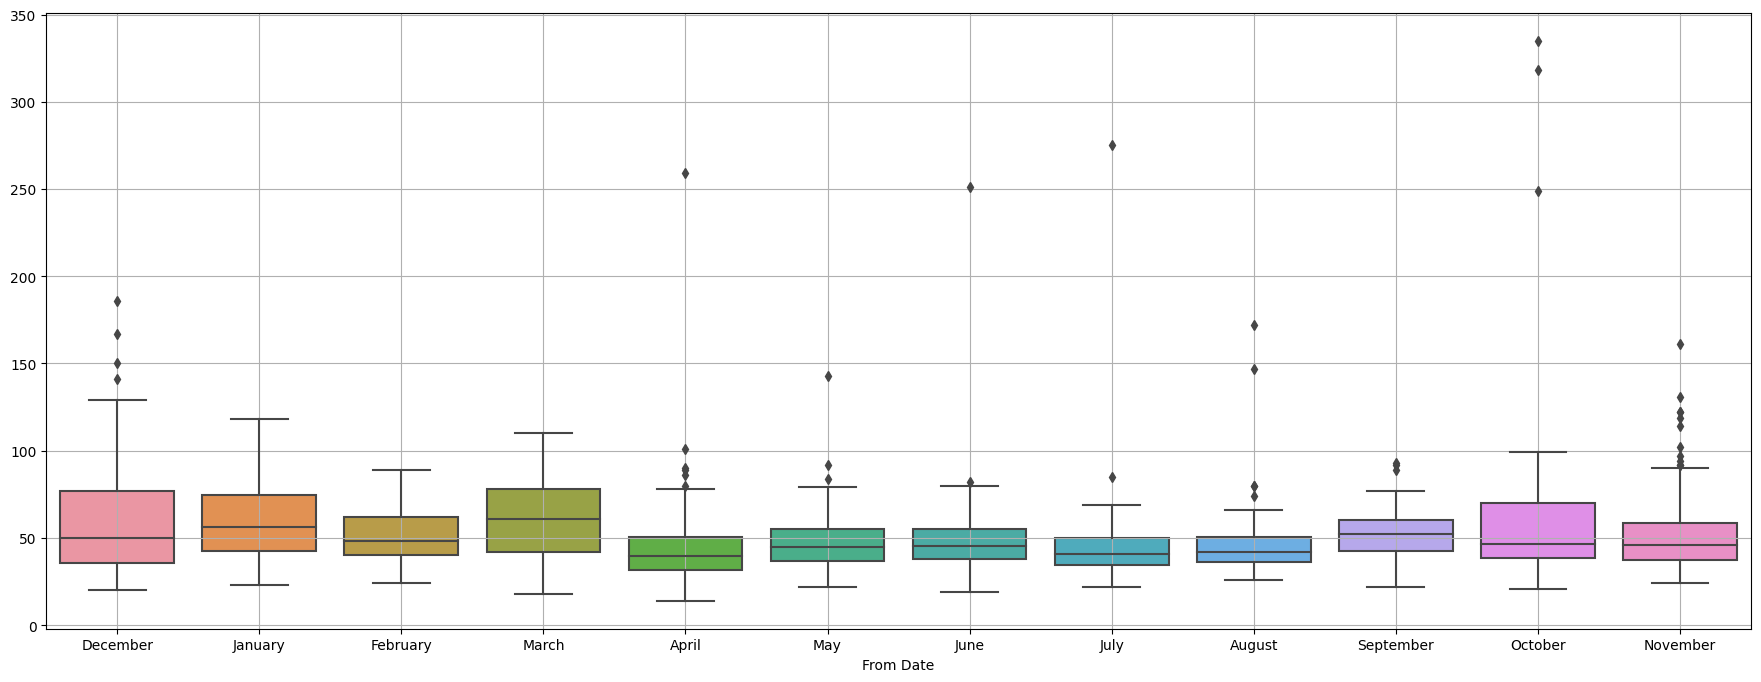

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [ ]:
train             = df[df.index<'2022-12-15']
test              = df[(df.index>='2022-12-15') & (df.index < '2023-02-01')]

In [ ]:
print(train.shape)
print(test.shape)

(702, 1)
(38, 1)


In [ ]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             AQI_Value
From Date            
2021-12-01         47
2021-01-13         75
2021-01-14         53
2021-01-15         65
2021-01-16         56 

Last few rows of Training Data 
             AQI_Value
From Date            
2022-10-12         43
2022-11-12         55
2022-12-12         38
2022-12-13         25
2022-12-14         25 

First few rows of Test Data 
             AQI_Value
From Date            
2022-12-15         43
2022-12-16         59
2022-12-17         90
2022-12-18         95
2022-12-19         76 

Last few rows of Test Data 
             AQI_Value
From Date            
2023-01-28         84
2023-01-29         93
2023-01-30         73
2023-01-31         76
2023-01-02         70 



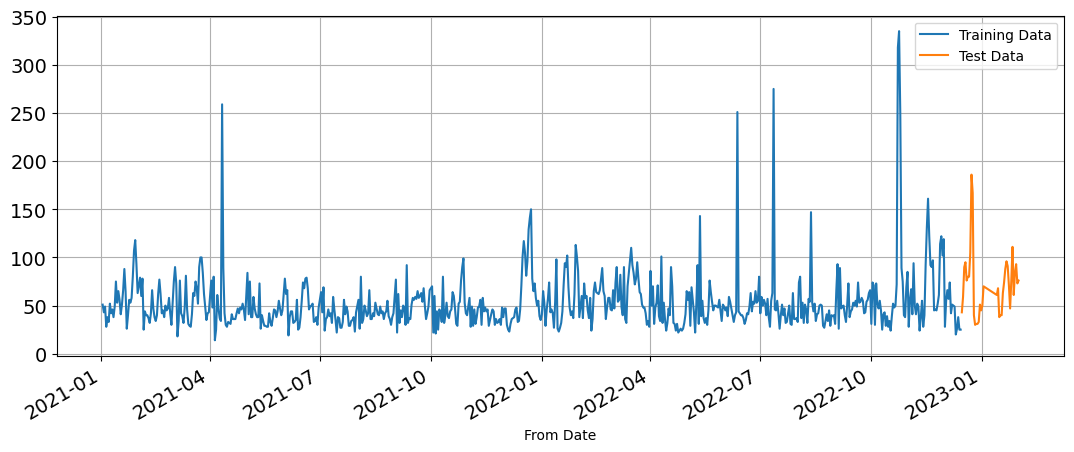

In [ ]:
train['AQI_Value'].plot(figsize=(13,5), fontsize=14)
test['AQI_Value'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model 1: Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+703 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             AQI_Value  time
From Date                  
2021-12-01         47     1
2021-01-13         75     2
2021-01-14         53     3
2021-01-15         65     4
2021-01-16         56     5 

Last few rows of Training Data 
             AQI_Value  time
From Date                  
2022-10-12         43   698
2022-11-12         55   699
2022-12-12         38   700
2022-12-13         25   701
2022-12-14         25   702 

First few rows of Test Data 
             AQI_Value  time
From Date                  
2022-12-15         43   703
2022-12-16         59   704
2022-12-17         90   705
2022-12-18         95   706
2022-12-19         76   707 

Last few rows of Test Data 
             AQI_Value  time
From Date                  
2023-01-28         84   736
2023-01-29         93   737
2023-01-30         73   738
2023-01-31         76   739
2023-01-02         70   740 



In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['AQI_Value'].values)

LinearRegression()

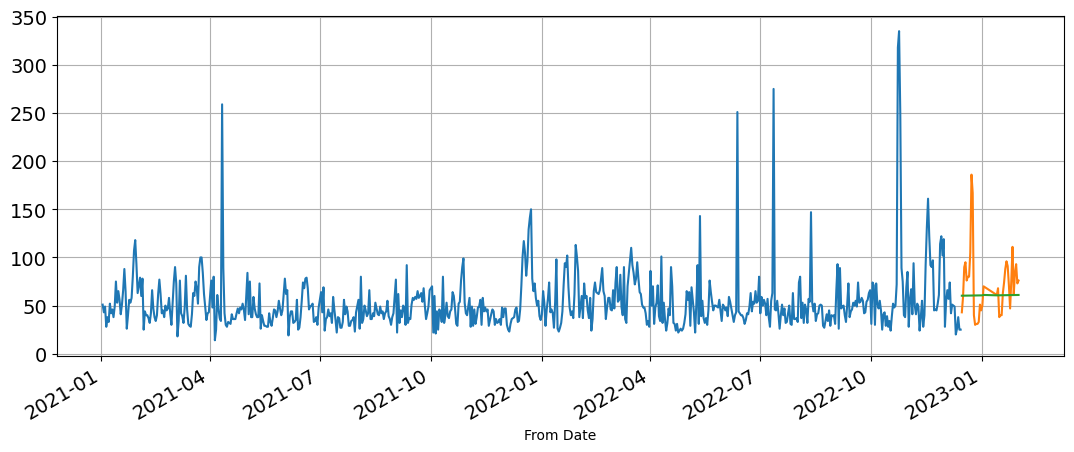

In [ ]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
train['AQI_Value'].plot(figsize=(13,5), fontsize=14)
test['AQI_Value'].plot(figsize=(13,5), fontsize=14)
LinearRegression_test['RegOnTime'].plot(figsize=(13,5), fontsize=14)
plt.grid();

In [ ]:
from sklearn import metrics

In [ ]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['AQI_Value'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 34.918


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['LinearRegression'])
resultsDf

,Test RMSE
LinearRegression,34.918488


# Model 2: Naive Approach

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [ ]:
NaiveModel_test['naive'] = np.asarray(train['AQI_Value'])[len(np.asarray(train['AQI_Value']))-1]
NaiveModel_test['naive'].head()

From Date
2022-12-15    25
2022-12-16    25
2022-12-17    25
2022-12-18    25
2022-12-19    25
Name: naive, dtype: int64

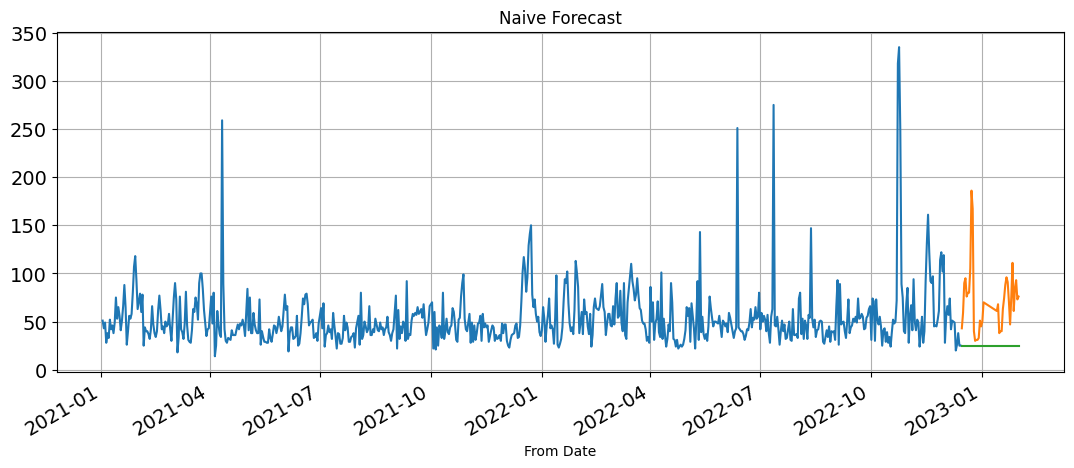

In [ ]:
plt.figure(figsize=(12,8))
NaiveModel_train['AQI_Value'].plot(figsize=(13,5), fontsize=14)
test['AQI_Value'].plot(figsize=(13,5), fontsize=14)
NaiveModel_test['naive'].plot(figsize=(13,5), fontsize=14)
plt.title("Naive Forecast")
plt.grid();

In [ ]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['AQI_Value'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 57.062


In [ ]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
LinearRegression,34.918488
NaiveModel,57.062062


# Model 3: Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [ ]:
SimpleAverage_test['mean_forecast'] = train['AQI_Value'].mean()
SimpleAverage_test.head()

,AQI_Value,mean_forecast
From Date,,
2022-12-15,43,52.816239
2022-12-16,59,52.816239
2022-12-17,90,52.816239
2022-12-18,95,52.816239
2022-12-19,76,52.816239


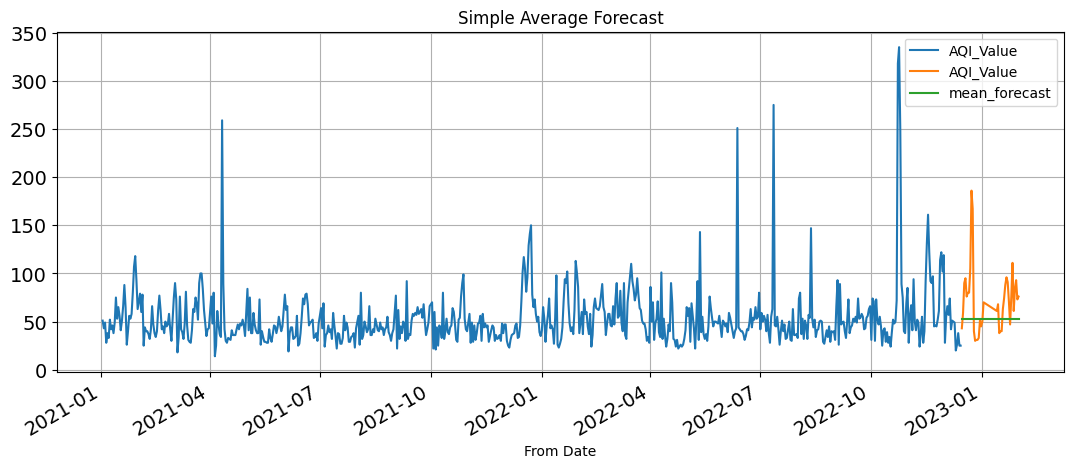

In [ ]:
plt.figure(figsize=(12,8))
SimpleAverage_train['AQI_Value'].plot(figsize=(13,5), fontsize=14)
SimpleAverage_test['AQI_Value'].plot(figsize=(13,5), fontsize=14)
SimpleAverage_test['mean_forecast'].plot(figsize=(13,5), fontsize=14)
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['AQI_Value'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 38.063


In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
LinearRegression,34.918488
NaiveModel,57.062062
SimpleAverageModel,38.062684


# Model 4: Moving Average

In [ ]:
MovingAverage = df.copy()
MovingAverage.head()

,AQI_Value
From Date,
2021-12-01,47
2021-01-13,75
2021-01-14,53
2021-01-15,65
2021-01-16,56


In [ ]:

MovingAverage['Trailing_2'] = MovingAverage['AQI_Value'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['AQI_Value'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['AQI_Value'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['AQI_Value'].rolling(9).mean()

MovingAverage.head()

,AQI_Value,Trailing_2,Trailing_4,Trailing_6,Trailing_9
From Date,,,,,
2021-12-01,47,NaN,NaN,NaN,NaN
2021-01-13,75,61.0,NaN,NaN,NaN
2021-01-14,53,64.0,NaN,NaN,NaN
2021-01-15,65,59.0,60.00,NaN,NaN
2021-01-16,56,60.5,62.25,NaN,NaN


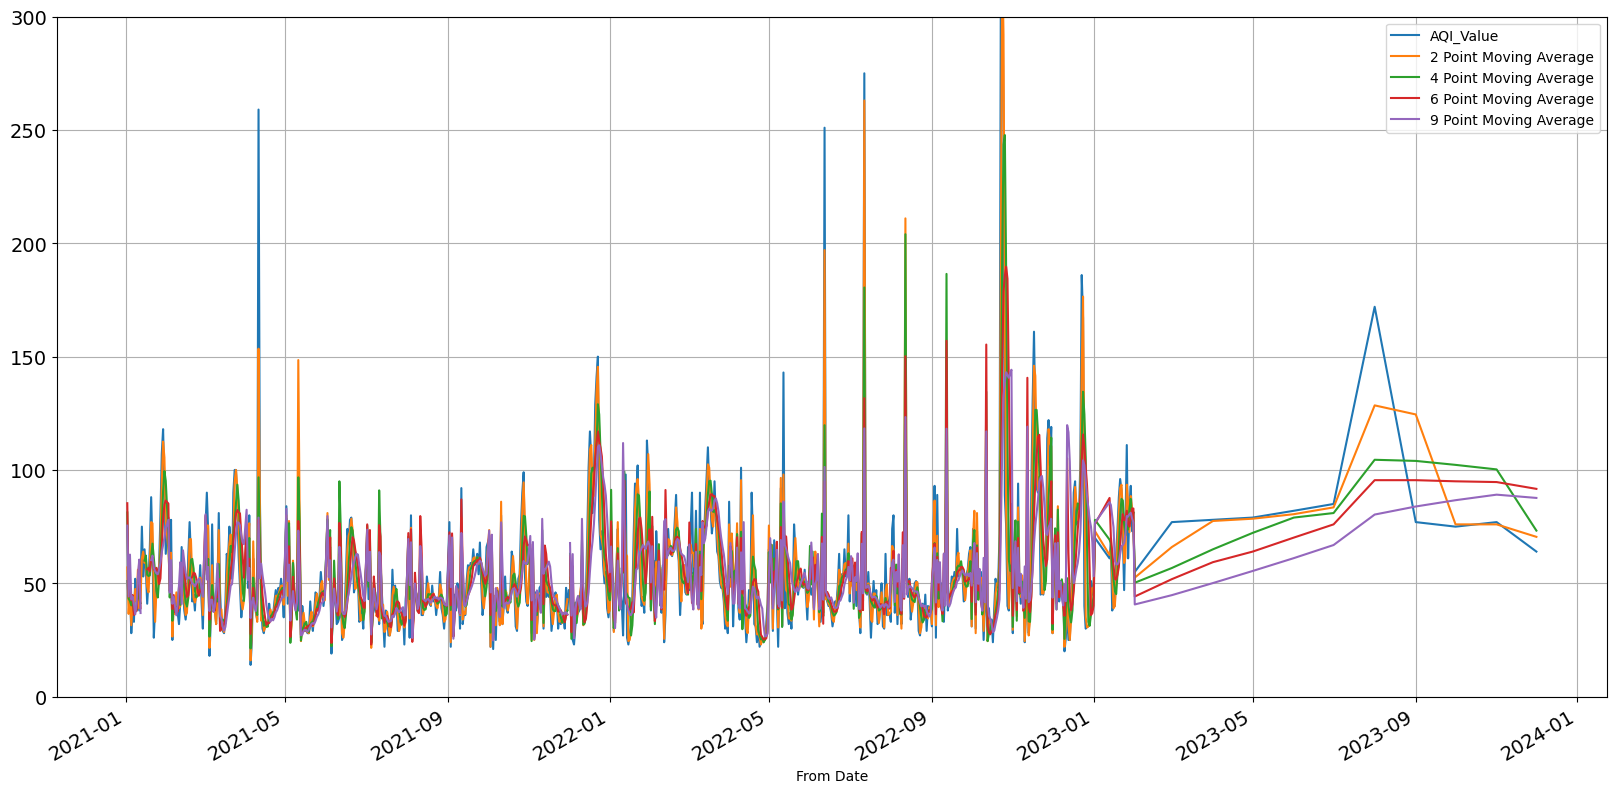

In [ ]:
## Plotting on the whole data

plt.figure(figsize=(20,10))
plt.ylim(0, 300)
MovingAverage['AQI_Value'].plot(figsize=(20,10), fontsize=14)
MovingAverage['Trailing_2'].plot(figsize=(20,10), fontsize=14, label='2 Point Moving Average')
MovingAverage['Trailing_4'].plot(figsize=(20,10), fontsize=14, label='4 Point Moving Average')
MovingAverage['Trailing_6'].plot(figsize=(20,10), fontsize=14, label='6 Point Moving Average')
MovingAverage['Trailing_9'].plot(figsize=(20,10), fontsize=14, label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
MovingAverage.head()

,AQI_Value,Trailing_2,Trailing_4,Trailing_6,Trailing_9
From Date,,,,,
2021-12-01,47,NaN,NaN,NaN,NaN
2021-01-13,75,61.0,NaN,NaN,NaN
2021-01-14,53,64.0,NaN,NaN,NaN
2021-01-15,65,59.0,60.00,NaN,NaN
2021-01-16,56,60.5,62.25,NaN,NaN


In [ ]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[:-38]
trailing_MovingAverage_test=MovingAverage[-38:]

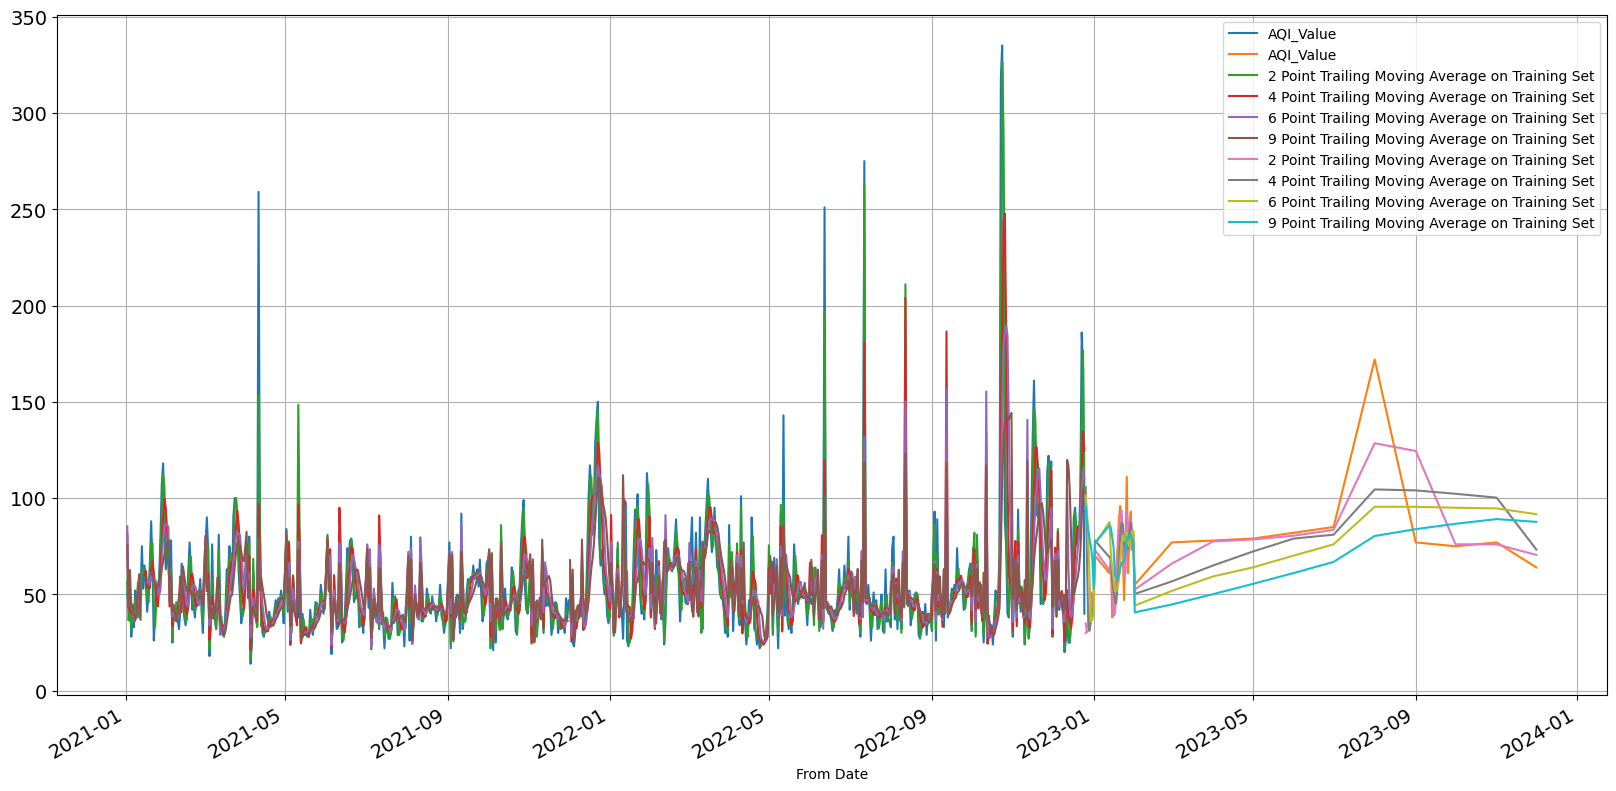

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,10))
trailing_MovingAverage_train['AQI_Value'].plot(figsize=(20,10), fontsize=14)
trailing_MovingAverage_test['AQI_Value'].plot(figsize=(20,10), fontsize=14)

trailing_MovingAverage_train['Trailing_2'].plot(figsize=(20,10), fontsize=14,  label='2 Point Trailing Moving Average on Training Set')
trailing_MovingAverage_train['Trailing_4'].plot(figsize=(20,10), fontsize=14,  label='4 Point Trailing Moving Average on Training Set')
trailing_MovingAverage_train['Trailing_6'].plot(figsize=(20,10), fontsize=14,  label='6 Point Trailing Moving Average on Training Set')
trailing_MovingAverage_train['Trailing_9'].plot(figsize=(20,10), fontsize=14,  label='9 Point Trailing Moving Average on Training Set')

trailing_MovingAverage_test['Trailing_2'].plot(figsize=(20,10), fontsize=14,  label='2 Point Trailing Moving Average on Training Set')
trailing_MovingAverage_test['Trailing_4'].plot(figsize=(20,10), fontsize=14,  label='4 Point Trailing Moving Average on Training Set')
trailing_MovingAverage_test['Trailing_6'].plot(figsize=(20,10), fontsize=14,  label='6 Point Trailing Moving Average on Training Set')
trailing_MovingAverage_test['Trailing_9'].plot(figsize=(20,10), fontsize=14,  label='9 Point Trailing Moving Average on Training Set')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['AQI_Value'],trailing_MovingAverage_test['Trailing_2'],squared=False)

print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['AQI_Value'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['AQI_Value'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['AQI_Value'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 41.526
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 43.874
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 42.923
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 40.946 


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
LinearRegression,34.918488
NaiveModel,57.062062
SimpleAverageModel,38.062684
2pointTrailingMovingAverage,41.525515
4pointTrailingMovingAverage,43.873903
6pointTrailingMovingAverage,42.923117
9pointTrailingMovingAverage,40.945918


In [ ]:
# ## Plotting on both Training and Test data

# plt.figure(figsize=(30,12))
# plt.plot(train['AQI_Value'], label='Train')
# plt.plot(test['AQI_Value'], label='Test')

# plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

# plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

# plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

# plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


# plt.legend(loc='best')
# plt.title("Model Comparison Plots")
# plt.grid();

# Model 5: Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
SES_train

,AQI_Value
From Date,
2021-12-01,47
2021-01-13,75
2021-01-14,53
2021-01-15,65
2021-01-16,56
...,...
2022-10-12,43
2022-11-12,55
2022-12-12,38


In [ ]:
model_SES = SimpleExpSmoothing(SES_train['AQI_Value'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
model_SES_autofit.params

{'smoothing_level': 0.9918605658272831,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 47.22629212720642,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# SES_test['predict'] =
model_SES_autofit.forecast(38)
# pd.options.display.float_format = '{:.2f}'.format
# SES_test

702    25.00087
703    25.00087
704    25.00087
705    25.00087
706    25.00087
707    25.00087
708    25.00087
709    25.00087
710    25.00087
711    25.00087
712    25.00087
713    25.00087
714    25.00087
715    25.00087
716    25.00087
717    25.00087
718    25.00087
719    25.00087
720    25.00087
721    25.00087
722    25.00087
723    25.00087
724    25.00087
725    25.00087
726    25.00087
727    25.00087
728    25.00087
729    25.00087
730    25.00087
731    25.00087
732    25.00087
733    25.00087
734    25.00087
735    25.00087
736    25.00087
737    25.00087
738    25.00087
739    25.00087
dtype: float64

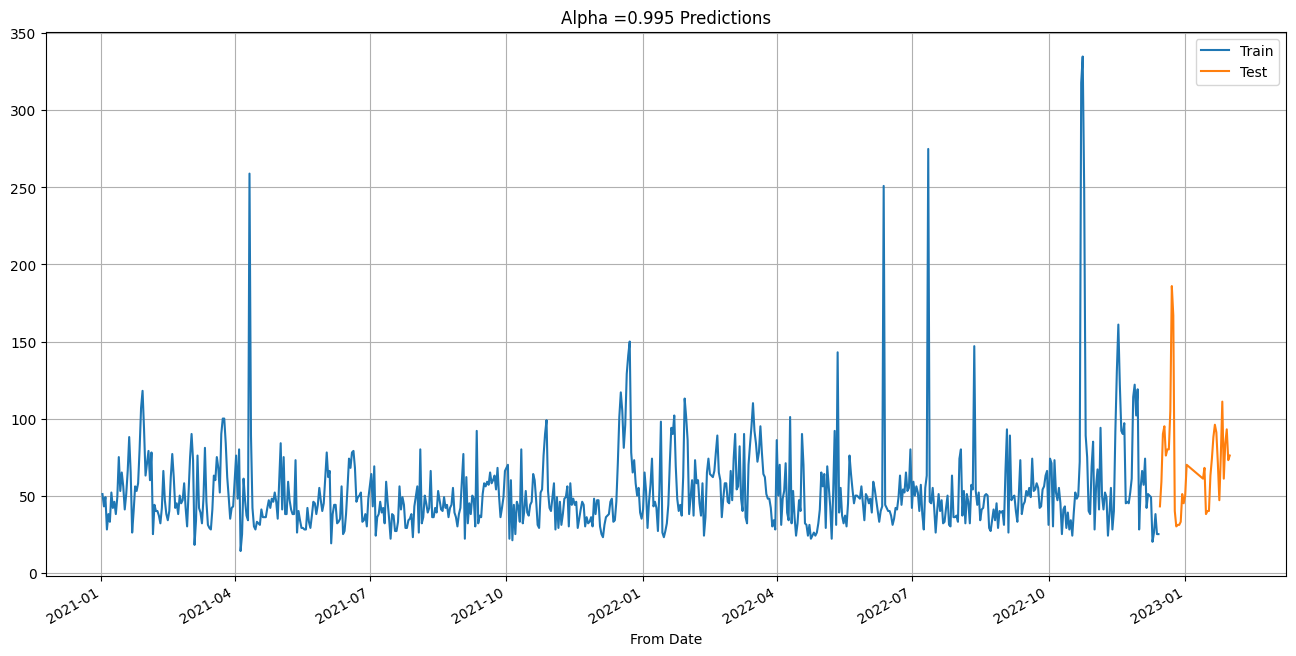

In [ ]:
SES_train['AQI_Value'].plot(figsize=(16,8),label='Train')
SES_test['AQI_Value'].plot(figsize=(16,8),label='Test')
# model_SES_autofit.forecast(38).plot(figsize=(16,8),label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')
# plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [ ]:
TES_train = train.copy()
TES_test = test.copy()


In [ ]:
# model_TES = ExponentialSmoothing(TES_train['AQI_Value'],trend='additive',seasonal='multiplicative',freq='M')

# Model 6: Prophet

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [ ]:
df1=df_1.copy()
df1.head()

,From Date,AQI_Value
0,2021-12-01,47
1,2021-01-13,75
2,2021-01-14,53
3,2021-01-15,65
4,2021-01-16,56


In [ ]:
df1.columns=['ds','y']

In [ ]:
df1['ds']=pd.to_datetime(df1['ds'])
df1.tail()

,ds,y
746,2023-01-28,84
747,2023-01-29,93
748,2023-01-30,73
749,2023-01-31,76
750,2023-01-02,70


<Axes: xlabel='ds'>

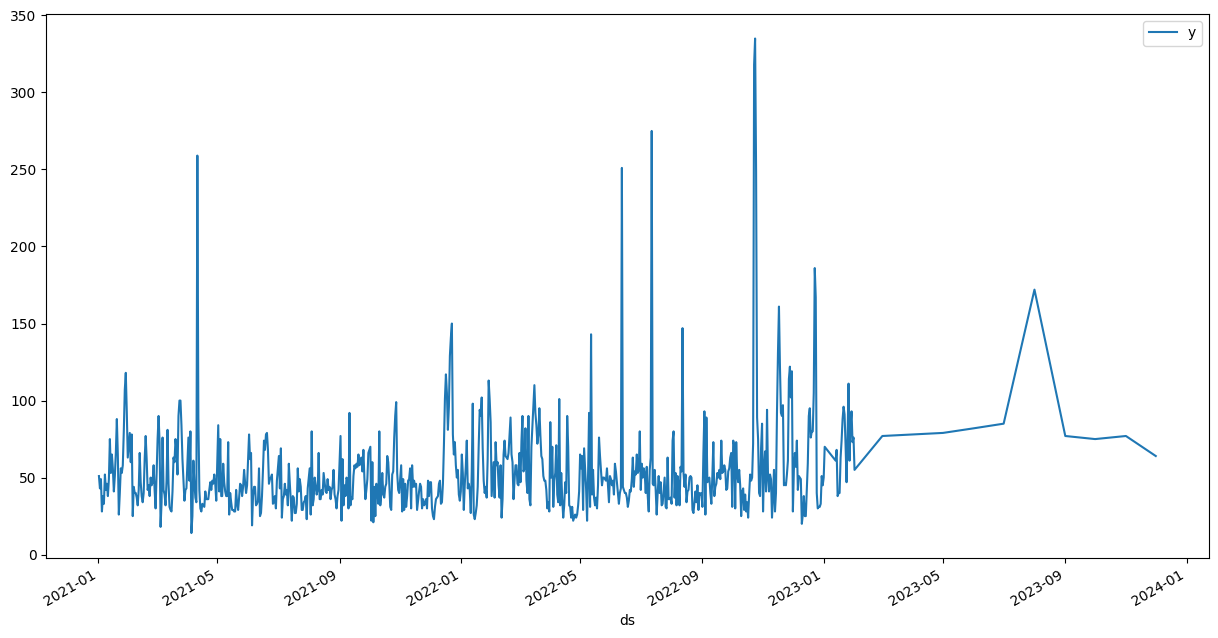

In [ ]:
df1.plot(x='ds',y='y',figsize=(15,8))

In [ ]:
len(df1)

751

In [ ]:
train_prophet=df1.iloc[:len(df)-100]
test_prophet=df1.iloc[len(df)-100:]

In [ ]:
m=Prophet(yearly_seasonality=True)
m.fit(train_prophet)
future=m.make_future_dataframe(periods=92) #MS for monthly, H for hourly, Daily is defauly
forecast=m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvoptzu5o/q9iou5px.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvoptzu5o/9vvjnxwr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27098', 'data', 'file=/tmp/tmpvoptzu5o/q9iou5px.json', 'init=/tmp/tmpvoptzu5o/9vvjnxwr.json', 'output', 'file=/tmp/tmpvoptzu5o/prophet_modelp4eyrdu1/prophet_model-20230513095833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail() #yhat gives upper lower limit of predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
738,2023-03-08,56.564054,39.621511,96.177496,56.564028,56.564085,12.418137,12.418137,12.418137,0.212002,0.212002,0.212002,12.206136,12.206136,12.206136,0.0,0.0,0.0,68.982191
739,2023-03-09,56.575988,41.463751,100.305837,56.575962,56.576019,15.420421,15.420421,15.420421,2.366199,2.366199,2.366199,13.054222,13.054222,13.054222,0.0,0.0,0.0,71.996409
740,2023-03-10,56.587922,37.277999,99.305639,56.587895,56.587954,12.778696,12.778696,12.778696,-1.029270,-1.029270,-1.029270,13.807965,13.807965,13.807965,0.0,0.0,0.0,69.366618
741,2023-03-11,56.599856,38.224568,102.169327,56.599829,56.599888,13.612226,13.612226,13.612226,-0.844686,-0.844686,-0.844686,14.456912,14.456912,14.456912,0.0,0.0,0.0,70.212082
742,2023-03-12,56.611790,42.954865,104.582347,56.611762,56.611823,17.065147,17.065147,17.065147,2.072044,2.072044,2.072044,14.993103,14.993103,14.993103,0.0,0.0,0.0,73.676937


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
738,2023-03-08,68.982191,39.621511,96.177496
739,2023-03-09,71.996409,41.463751,100.305837
740,2023-03-10,69.366618,37.277999,99.305639
741,2023-03-11,70.212082,38.224568,102.169327
742,2023-03-12,73.676937,42.954865,104.582347


In [ ]:
test_prophet.tail()

,ds,y
746,2023-01-28,84
747,2023-01-29,93
748,2023-01-30,73
749,2023-01-31,76
750,2023-01-02,70


In [ ]:
plot_plotly(m,forecast)

In [ ]:
plot_components_plotly(m,forecast)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions_prophet= forecast.iloc[-100:]['yhat']

In [ ]:
## Test Data - RMSE

rmse_model6_test = metrics.mean_squared_error(test_prophet['y'],predictions_prophet,squared=False)
print("For Prophet forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For Prophet forecast on the Test Data,  RMSE is 50.842


In [ ]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
LinearRegression,34.918488
NaiveModel,57.062062
SimpleAverageModel,38.062684
2pointTrailingMovingAverage,41.525515
4pointTrailingMovingAverage,43.873903
6pointTrailingMovingAverage,42.923117
9pointTrailingMovingAverage,40.945918
Prophet,50.841512


# Model 7: XGBoost

In [ ]:
print(train.shape)
print(test.shape)

(702, 1)
(38, 1)


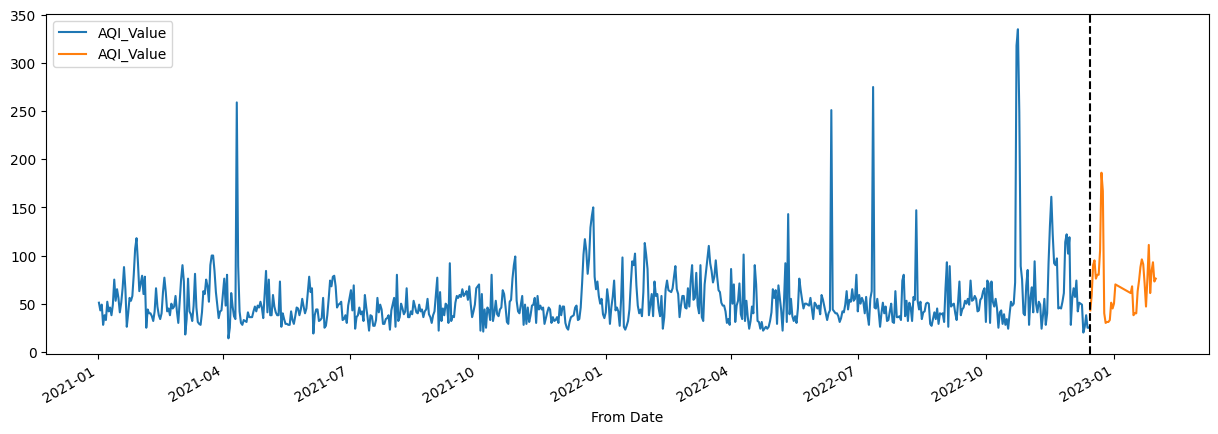

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline('2022-12-15', color='black',ls='--')
plt.show()

<h3> Feature Creation </h3>

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df2 = df.copy()
    df2['dayofweek'] = df2.index.dayofweek
    df2['quarter'] = df2.index.quarter
    df2['month'] = df2.index.month
    df2['year'] = df2.index.year
    df2['dayofyear'] = df2.index.dayofyear
    df2['dayofmonth'] = df2.index.day
    df2['weekofyear'] = df2.index.isocalendar().week
    return df2

df2 = create_features(df)

In [ ]:
train_xgb = create_features(train.copy())
test_xgb = create_features(test.copy())

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AQI_Value'

X_train = train_xgb[FEATURES]
y_train = train_xgb[TARGET]

X_test = test_xgb[FEATURES]
y_test = test_xgb[TARGET]

In [ ]:
import xgboost as xgb
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=25)

[0]	validation_0-rmse:45.96190	validation_1-rmse:58.86902
[25]	validation_0-rmse:11.17115	validation_1-rmse:29.15067
[50]	validation_0-rmse:7.06764	validation_1-rmse:29.61487
[57]	validation_0-rmse:6.40822	validation_1-rmse:29.64694


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

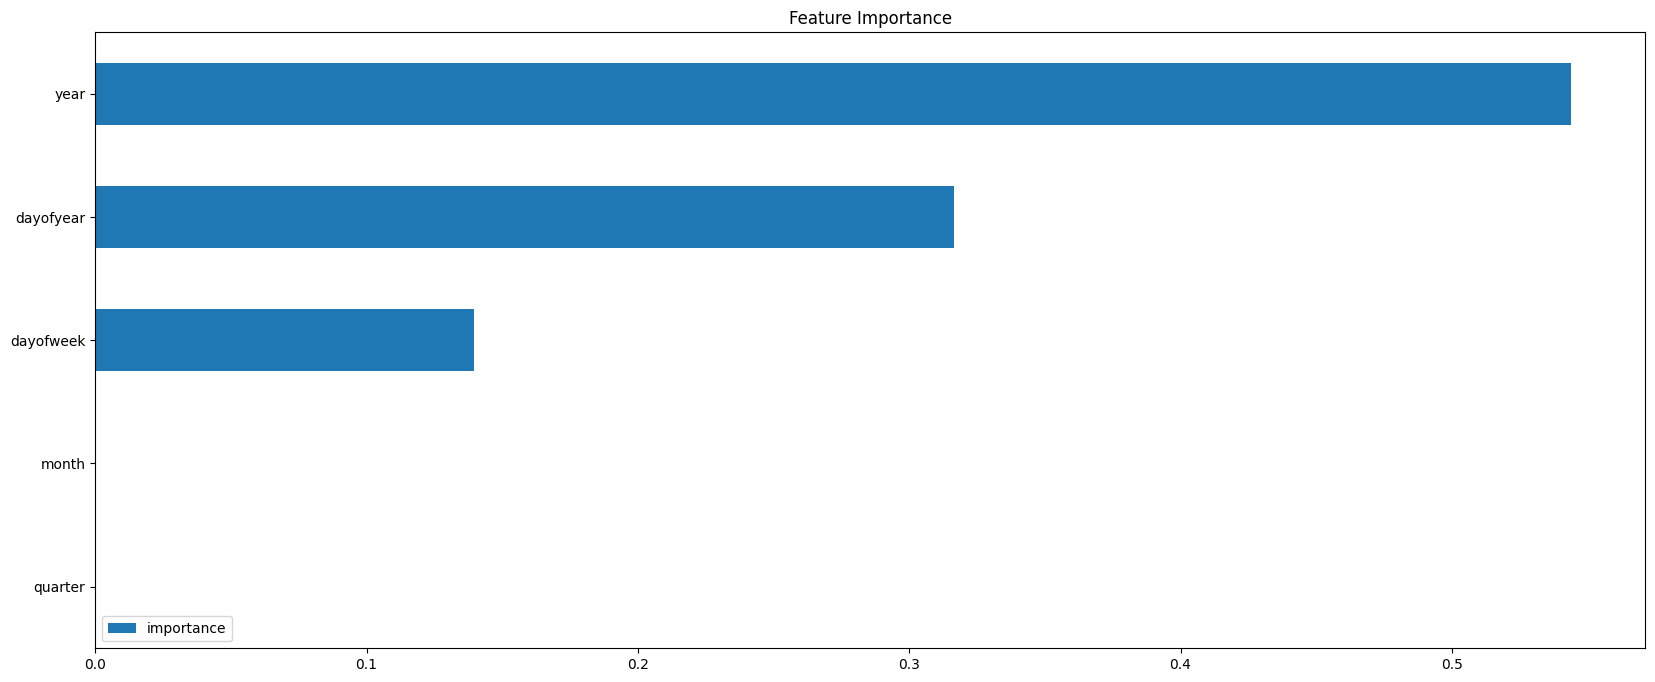

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
test_xgb['prediction'] = reg.predict(X_test)
df2 = df2.merge(test_xgb[['prediction']], how='left', left_index=True, right_index=True)

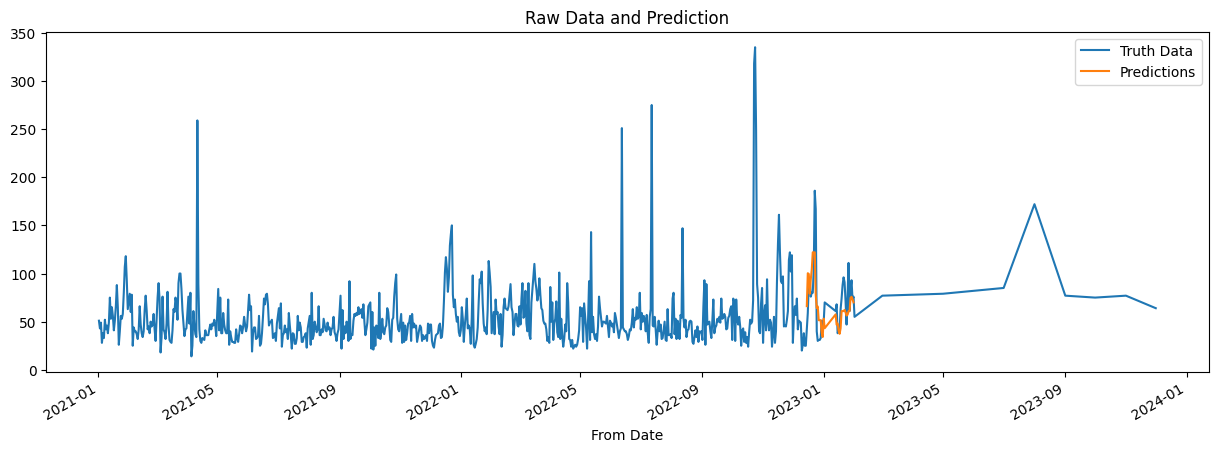

In [ ]:
ax = df[['AQI_Value']].plot(figsize=(15, 5))
df2['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
## Test Data - RMSE

rmse_model7_test = metrics.mean_squared_error(test_xgb['AQI_Value'], test_xgb['prediction'],squared=False)
print("For Prophet forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For Prophet forecast on the Test Data,  RMSE is 27.652


In [ ]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]},index=['XGBoost'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
LinearRegression,34.918488
NaiveModel,57.062062
SimpleAverageModel,38.062684
2pointTrailingMovingAverage,41.525515
4pointTrailingMovingAverage,43.873903
6pointTrailingMovingAverage,42.923117
9pointTrailingMovingAverage,40.945918
Prophet,50.841512
XGBoost,27.652383


# Model 8: LSTM

In [ ]:
train_lstm=train.copy()
test_lstm=test.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train_lstm)
scaled_train=scaler.transform(train_lstm)
scaled_test=scaler.transform(test_lstm)

In [ ]:
scaled_test

array([[0.09034268],
       [0.14018692],
       [0.23676012],
       [0.25233645],
       [0.19314642],
       [0.20560748],
       [0.20560748],
       [0.2834891 ],
       [0.53582555],
       [0.47663551],
       [0.08099688],
       [0.04984424],
       [0.0529595 ],
       [0.0529595 ],
       [0.05919003],
       [0.1152648 ],
       [0.09657321],
       [0.11214953],
       [0.14641745],
       [0.1682243 ],
       [0.07476636],
       [0.08099688],
       [0.08099688],
       [0.15264798],
       [0.18691589],
       [0.2305296 ],
       [0.25545171],
       [0.23987539],
       [0.17757009],
       [0.10280374],
       [0.19314642],
       [0.30218069],
       [0.14641745],
       [0.21806854],
       [0.24610592],
       [0.18380062],
       [0.19314642],
       [0.17445483]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#define generator
n_input=100
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=30)

Epoch 1/30
602/602 [==============================] - 30s 48ms/step - loss: 0.0089
Epoch 2/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0073
Epoch 3/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0067
Epoch 4/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0060
Epoch 5/30
602/602 [==============================] - 24s 39ms/step - loss: 0.0055
Epoch 6/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0053
Epoch 7/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0052
Epoch 8/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0050
Epoch 9/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0050
Epoch 10/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0051
Epoch 11/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0049
Epoch 12/30
602/602 [==============================] - 24s 40ms/step - loss: 0.0050
E

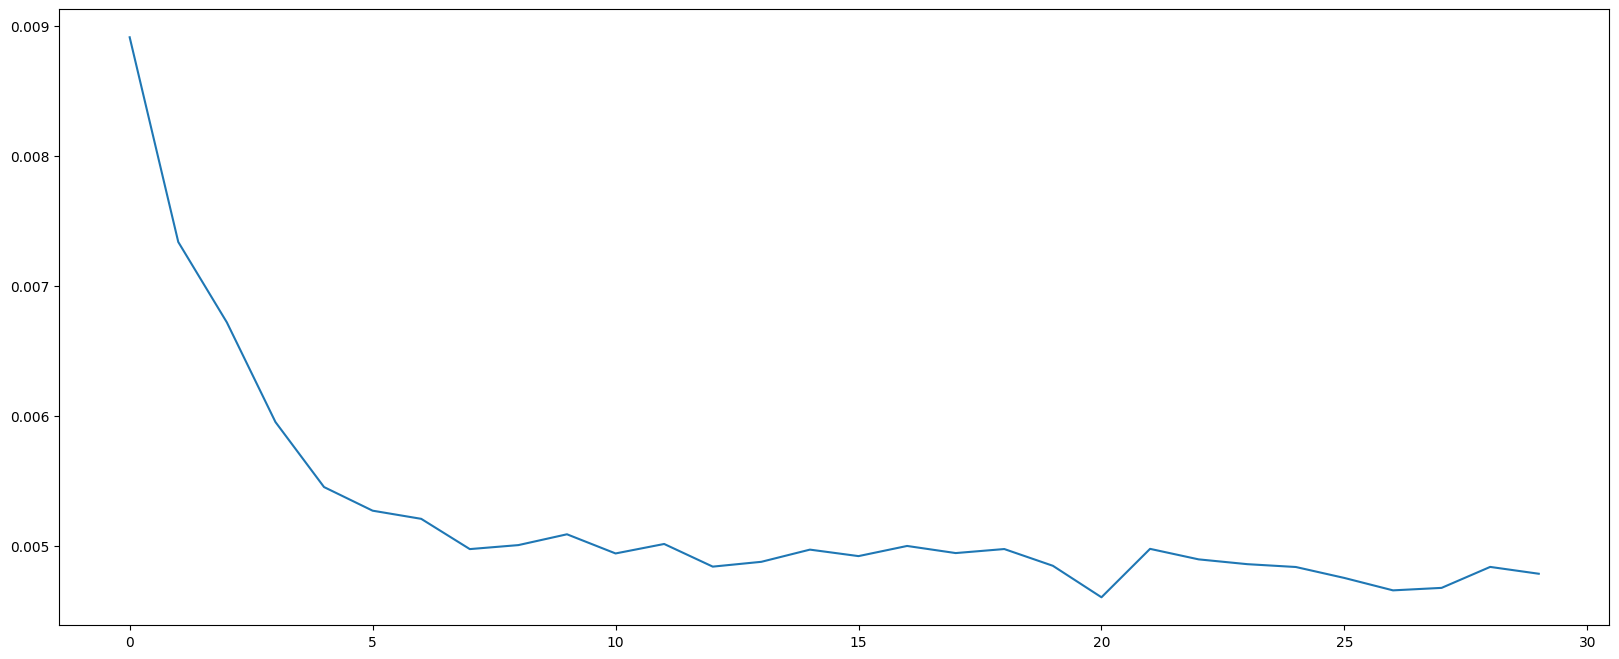

In [ ]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test_predictions=[]
first_eval_batch= scaled_train[-n_input:]
current_batch= first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):

  #get current prediction value for 1st batch
  current_pred=model.predict(current_batch)[0]

  #append prediction into array
  test_predictions.append(current_pred)

  #use the prediction to update batch and remove first value
  current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 46ms/step


In [ ]:
test_predictions

[array([0.0614212], dtype=float32),
 array([0.08018295], dtype=float32),
 array([0.09031735], dtype=float32),
 array([0.09319852], dtype=float32),
 array([0.09287995], dtype=float32),
 array([0.09246187], dtype=float32),
 array([0.09292676], dtype=float32),
 array([0.09394097], dtype=float32),
 array([0.09493822], dtype=float32),
 array([0.09562495], dtype=float32),
 array([0.09599422], dtype=float32),
 array([0.09616407], dtype=float32),
 array([0.09624542], dtype=float32),
 array([0.09629599], dtype=float32),
 array([0.09633197], dtype=float32),
 array([0.09635349], dtype=float32),
 array([0.09636062], dtype=float32),
 array([0.09635718], dtype=float32),
 array([0.09634848], dtype=float32),
 array([0.09633873], dtype=float32),
 array([0.09633017], dtype=float32),
 array([0.09632342], dtype=float32),
 array([0.09631833], dtype=float32),
 array([0.09631459], dtype=float32),
 array([0.09631188], dtype=float32),
 array([0.09631002], dtype=float32),
 array([0.09630881], dtype=float32),
 a

In [ ]:
test_lstm.head()

,AQI_Value
From Date,
2022-12-15,43
2022-12-16,59
2022-12-17,90
2022-12-18,95
2022-12-19,76


In [ ]:
true_predictions= scaler.inverse_transform(test_predictions)
true_predictions

array([[33.7162066 ],
       [39.73872845],
       [42.99187051],
       [43.91672347],
       [43.81446427],
       [43.68025999],
       [43.82948853],
       [44.15505003],
       [44.47516817],
       [44.69561008],
       [44.81414436],
       [44.86866649],
       [44.89477838],
       [44.91101281],
       [44.92256202],
       [44.92946906],
       [44.93176025],
       [44.93065532],
       [44.92786188],
       [44.92473362],
       [44.92198563],
       [44.91981881],
       [44.91818532],
       [44.91698233],
       [44.91611417],
       [44.91551626],
       [44.91512881],
       [44.91489922],
       [44.91477963],
       [44.9147318 ],
       [44.91472702],
       [44.91474376],
       [44.91476768],
       [44.91479398],
       [44.91482029],
       [44.91484182],
       [44.91486095],
       [44.9148753 ]])

<Axes: xlabel='From Date'>

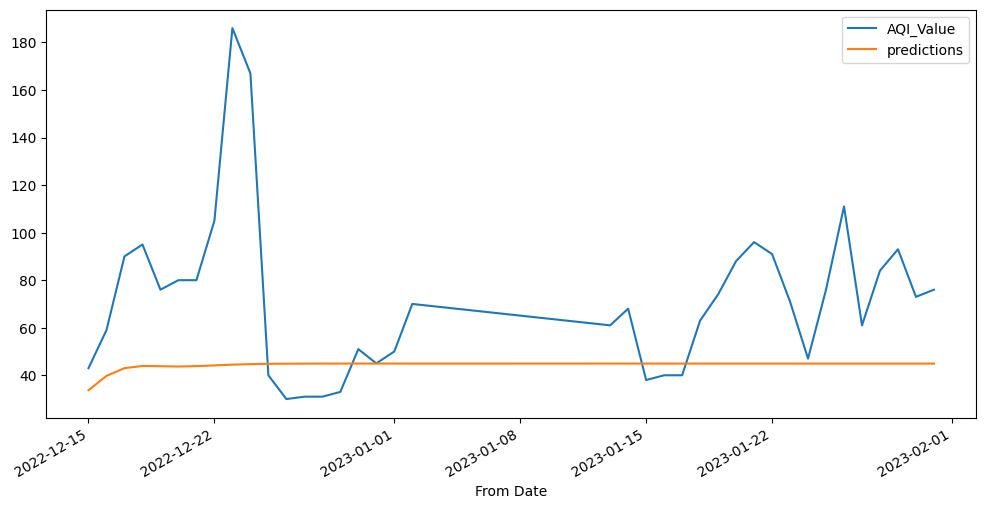

In [ ]:
test_lstm['predictions']=true_predictions
test_lstm.plot(figsize=(12,6))

In [ ]:
## Test Data - RMSE

rmse_model8_test = metrics.mean_squared_error(test_lstm['AQI_Value'], test_lstm['predictions'],squared=False)
print("For Prophet forecast on the Test Data,  RMSE is %3.3f" %(rmse_model8_test))

For Prophet forecast on the Test Data,  RMSE is 42.802


In [ ]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_model8_test]},index=['LSTM'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
LinearRegression,34.918488
NaiveModel,57.062062
SimpleAverageModel,38.062684
2pointTrailingMovingAverage,41.525515
4pointTrailingMovingAverage,43.873903
6pointTrailingMovingAverage,42.923117
9pointTrailingMovingAverage,40.945918
Prophet,50.841512
XGBoost,27.652383
LSTM,42.801883


# Model 9: ARIMA

From Date
2021-12-31    Axes(0.125,0.2;0.775x0.68)
2022-12-31    Axes(0.125,0.2;0.775x0.68)
2023-12-31    Axes(0.125,0.2;0.775x0.68)
Freq: A-DEC, Name: AQI_Value, dtype: object

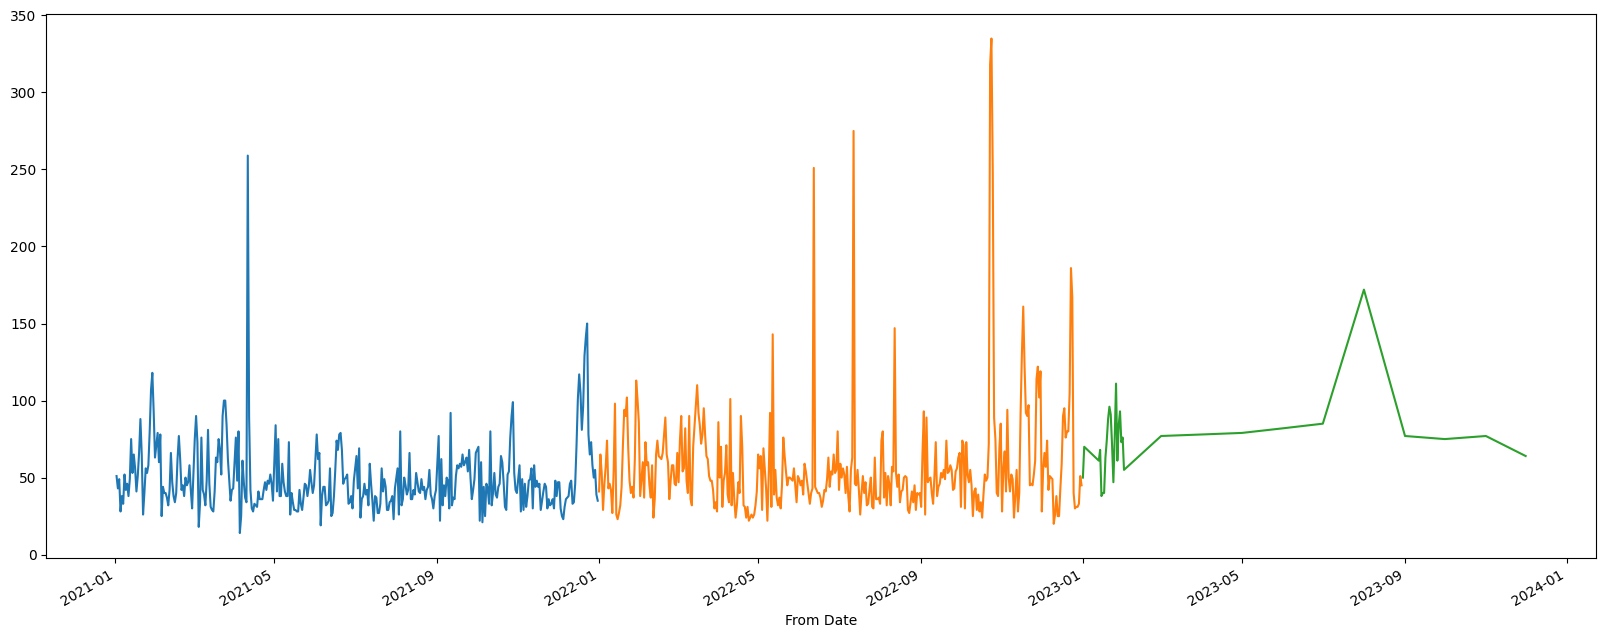

In [ ]:
ts=df['AQI_Value'].resample('A')
ts.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['AQI_Value'])

In [ ]:
def adfuller_test(aqi):
  result=adfuller(aqi)
  labels=['ADF Test Statistic','p-value','# of Lags used','# of Observations used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1]<=0.05:
      print("Highly likely to be Stationary")
  else:
      print("Highly like to be Non-stationary")

In [ ]:
adfuller_test(df['AQI_Value'])

ADF Test Statistic : -12.626146845422381
p-value : 1.5401224593649143e-23
# of Lags used : 1
# of Observations used : 749
Highly likely to be Stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

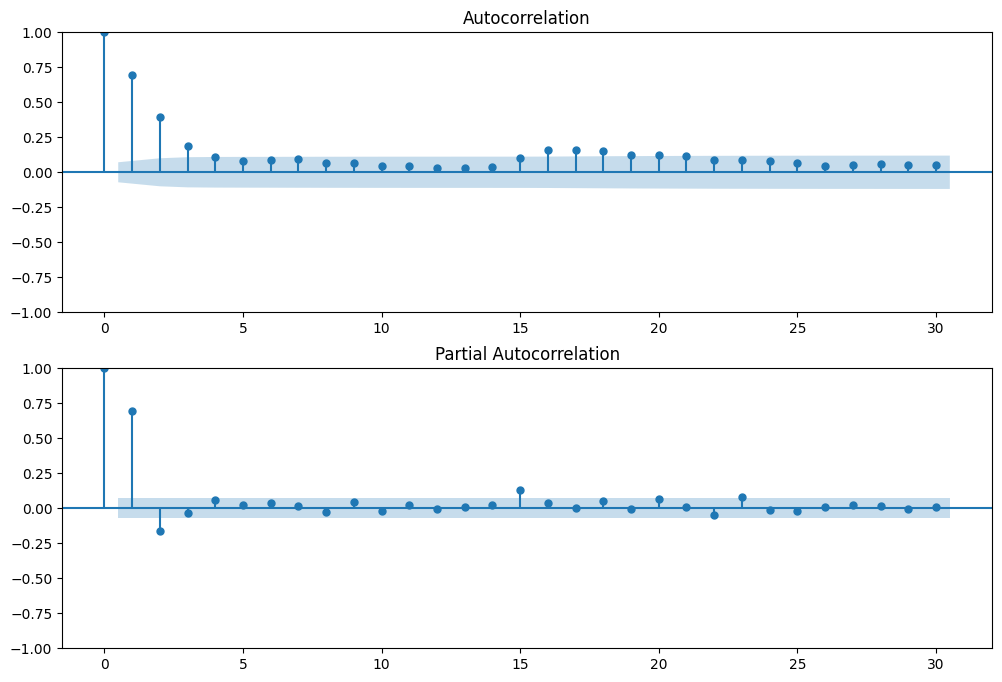

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['AQI_Value'].iloc[:],lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['AQI_Value'].iloc[:],lags=30,ax=ax2)

PACF(1) ACF(3/4) DIFF(0)

PACF->AR; ACF->MA

In [ ]:
train_arima=train.copy()
test_arima=test.copy()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_arima,order=(1,0,3))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              AQI_Value   No. Observations:                  702
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -3140.760
Date:                Sat, 13 May 2023   AIC                           6293.520
Time:                        09:58:20   BIC                           6320.843
Sample:                             0   HQIC                          6304.080
                                - 702                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8078      3.528     14.967      0.000      45.892      59.723
ar.L1          0.5290      0.178      2.967      0.003       0.180       0.878
ma.L1          0.2833      0.177      1.604      0.109      -0.063       0.629
ma.L2          0.1057      0.148      0.717      0.474      -0.184       0.395
ma.L3         -0.0553      0.100     -0.553      0.580      -0.251       0.141
sigma2       449.8957      6.648     67.670      0.000     436.865     462.926
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             70012.56
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.45   Skew:                             3.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        51.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pred_arima=model_fit.predict(start=len(train_arima),end=(len(train_arima)+len(test_arima)-1))
pred_arima.head()

702    35.674797
703    43.973091
704    48.476988
705    50.516966
706    51.596045
Name: predicted_mean, dtype: float64

In [ ]:
## Test Data - RMSE

rmse_model9_test = metrics.mean_squared_error(test_arima,pred_arima,squared=False)
print("For ARIMA forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For ARIMA forecast on the Test Data,  RMSE is 38.063


In [ ]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_model9_test]},index=['ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE
LinearRegression,34.918488
NaiveModel,57.062062
SimpleAverageModel,38.062684
2pointTrailingMovingAverage,41.525515
4pointTrailingMovingAverage,43.873903
6pointTrailingMovingAverage,42.923117
9pointTrailingMovingAverage,40.945918
Prophet,50.841512
XGBoost,27.652383
LSTM,42.801883


# **Model Accuracy in Order**

In [ ]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE
XGBoost,27.652383
LinearRegression,34.918488
SimpleAverageModel,38.062684
ARIMA,38.359289
9pointTrailingMovingAverage,40.945918
2pointTrailingMovingAverage,41.525515
LSTM,42.801883
6pointTrailingMovingAverage,42.923117
4pointTrailingMovingAverage,43.873903
Prophet,50.841512
